# Human Activity Recognition - Starter Model

The purpose of this notebook is to get you started to solve this problem.

The main steps of any Data Science Project can be roughly jotted as follows:

* Data Exploration
* Data Visualization
* Data Preprocessing
* Feature Engineering
* Modelling
* Validation, Evaluation, Testing

These steps overlap in multiple places and serve only as a guide to loosely follow.

Let's start by importing common data science packages

In [308]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization advanced

# Loading the Data

In [309]:
df_train = pd.read_csv('Human_activity_Dataset-train.csv')
df_test = pd.read_csv('Human_activity_Dataset-test.csv')

In [310]:
df_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
0             -0.841247              0.179941             -0.058627   
1             -0.844788              0.180289             -0.054317   
2             -0.848933              0.180637             -0.049118   
3             -0.848649              0.181935             -0.047663   
4             -0.847865              0.185151             -0.043892   

   subject/Participant  Activity  
0                    1  STANDING  
1                    1  STANDING  
2                    1  STANDING  
3                    1  STANDING  
4                    1  STANDING  

[5 rows x 563 columns]

In [311]:
df_test.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.279267          -0.020405          -0.110545         -0.994765   
1           0.272401          -0.016142          -0.105069         -0.991466   
2           0.272787          -0.013559          -0.103193         -0.992029   
3           0.284489          -0.018722          -0.109178         -0.996150   
4           0.281035          -0.019728          -0.109175         -0.995992   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.979858         -0.981183         -0.995257         -0.983396   
1         -0.963665         -0.980078         -0.992081         -0.966346   
2         -0.967390         -0.984775         -0.992049         -0.967757   
3         -0.982582         -0.986678         -0.996763         -0.981820   
4         -0.993861         -0.990929         -0.996720         -0.992964   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.982984         -0.935789  ...                        -0.399837   
1         -0.982595         -0.935789  ...                        -0.826425   
2         -0.984356         -0.939952  ...                        -0.798304   
3         -0.986152         -0.931171  ...                        -0.799192   
4         -0.990708         -0.931171  ...                        -0.935051   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.099474                              0.139375   
1                     0.203368                             -0.223342   
2                    -0.010752                             -0.311768   
3                    -0.420830                              0.080733   
4                    -0.112962                              0.042659   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                          0.219341                              0.193924   
1                          0.422026                              0.877938   
2                          0.211905                             -0.135413   
3                         -0.370190                             -0.764715   
4                         -0.267366                             -0.397421   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
0             -0.572664             -0.036452             -0.254853   
1             -0.573091             -0.035483             -0.255061   
2             -0.571755             -0.035738             -0.255972   
3             -0.569672             -0.037001             -0.256907   
4             -0.570800             -0.036454             -0.256324   

   subject/Participant  Activity  
0                   29   SITTING  
1                   29   SITTING  
2                   29   SITTING  
3                   29   SITTING  
4                   29   SITTING  

[5 rows x 563 columns]

In [312]:
df_train.shape

(6666, 563)

In [313]:
df_test.shape

(3633, 563)

With so many features, it would be impossible to see the plots for all. \
We will limit our exploration to get a basic understanding of what is happening.

# Data Exploration

#### 1. How many features are there? What are their datatypes?

In [314]:
df_train.shape

(6666, 563)

There are 563 features

In [315]:
df_train.dtypes.value_counts()

float64    561
int64        1
object       1
dtype: int64

In [316]:
df_train.select_dtypes('int64').head(3)

subject/Participant
0                    1
1                    1
2                    1

In [317]:
df_train.select_dtypes('object').head(3)

Activity
0  STANDING
1  STANDING
2  STANDING

So there are 561 floats, 2 integers and 1 object. \
Of which the 2 integers (Id and Subject) aren't relevant for predictions. \
The 1 object is the Activity (target) that is to be predicted. \
Remaining all 561 features are real values from sensor data.

#### 2. Summarize the features

In [318]:
import re

Looking at some of the names of the features, it seems that these are derived features from raw sensor data. \
The features starting with small 't' are time-domain features.\
The features starting with small 'f' are frequency-domain features.

In [319]:
columns = df_train.columns.to_numpy()

In [320]:
time_feats = []
time_func = set()
freq_feats = []
freq_func = set()
other_feats = []

n_time = 0
n_freq = 0
n_other = 0

regex_func = re.compile('-([a-z]+)')
regex_axis = re.compile('-([A-Z])')

for i in range(563):
    if np.char.startswith(columns[i],'t'):
        time_feats.append(columns[i])
        time_func.add(regex_func.findall(columns[i])[0])
        n_time += 1
    elif np.char.startswith(columns[i],'f'):
        freq_feats.append(columns[i])
        freq_func.add(regex_func.findall(columns[i])[0])
        n_freq += 1
    else:
        other_feats.append(columns[i])
        n_other += 1

In [321]:
print('Time freatures:',sorted(time_func))
print('Frequency freatures:',sorted(freq_func))

Time freatures: ['ar', 'correlation', 'energy', 'entropy', 'iqr', 'mad', 'max', 'mean', 'min', 'sma', 'std']
Frequency freatures: ['bands', 'energy', 'entropy', 'iqr', 'kurtosis', 'mad', 'max', 'mean', 'min', 'skewness', 'sma', 'std']


In [322]:
print('Other features:',sorted(other_feats))

Other features: ['Activity', 'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyAccMean,gravity)', 'angle(tBodyGyroJerkMean,gravityMean)', 'angle(tBodyGyroMean,gravityMean)', 'subject/Participant']


In [323]:
n_time, n_freq, n_other, n_time + n_freq + n_other

(265, 289, 9, 563)

#### 3. Is the target balanced?

In [324]:
df_train['Activity'].value_counts()

STANDING              1281
LAYING                1268
SITTING               1174
WALKING               1108
WALKING_UPSTAIRS       959
WALKING_DOWNSTAIRS     876
Name: Activity, dtype: int64

C:\Users\ns_ra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


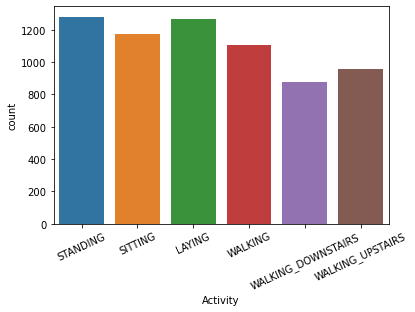

In [325]:
chart = sns.countplot(df_train['Activity'])
t = chart.set_xticklabels(chart.get_xticklabels(),rotation=25)

Seems more or less balanced.


#### 4. Which features are important?

In [326]:
act_map = {'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5}
df_train['activity_code'] = df_train['Activity'].map(act_map)

In [327]:
df_train['Activity'].value_counts()

STANDING              1281
LAYING                1268
SITTING               1174
WALKING               1108
WALKING_UPSTAIRS       959
WALKING_DOWNSTAIRS     876
Name: Activity, dtype: int64

In [328]:
df_train['activity_code'].value_counts()

0    1281
2    1268
1    1174
3    1108
5     959
4     876
Name: activity_code, dtype: int64

In [329]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
sns.heatmap(df_train[time_feats+['activity_code']].corr(), 
            cmap=sns.diverging_palette(240, 10, n=25), 
            cbar=True,ax=ax)

<AxesSubplot:>

In [330]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
sns.heatmap(df_train[freq_feats+['activity_code']].corr(), 
            cmap=sns.diverging_palette(240, 10, n=25), 
            cbar=True,ax=ax)

<AxesSubplot:>

# Modelling

In [331]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

Let's come up with a quick base model before further exploring the data. \
Firstly, let's remove Id, subject, Activity from the data.

In [332]:
df_train.drop(columns=['subject/Participant','Activity'], inplace=True)

In [333]:
y = df_train.pop('activity_code')
X = df_train

In [334]:
X.shape, y.shape

((6666, 561), (6666,))

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [336]:
X_train.shape, y_train.shape

((5332, 561), (5332,))

In [337]:
X_test.shape, y_test.shape

((1334, 561), (1334,))

In [338]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report

Let's do feature standardization before training the models

In [339]:
std_scaler = StandardScaler()
X_prep_train = std_scaler.fit_transform(X_train)
X_prep_test = std_scaler.transform(X_test)

Training the models

In [340]:
LR_clf = LogisticRegression()
LR_clf.fit(X_prep_train, y_train)

y_pred = LR_clf.predict(X_prep_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1025
           1       0.99      0.99      0.99       939
           2       1.00      1.00      1.00      1014
           3       1.00      1.00      1.00       886
           4       1.00      1.00      1.00       701
           5       1.00      1.00      1.00       767

    accuracy                           1.00      5332
   macro avg       1.00      1.00      1.00      5332
weighted avg       1.00      1.00      1.00      5332



C:\Users\ns_ra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**WOW**

Let's check for validation data

In [341]:
from sklearn.model_selection import cross_val_score, KFold

In [342]:
kfold = KFold(n_splits=5)

In [343]:
scores = cross_val_score(LR_clf, X_prep_train, y_train, scoring='accuracy', cv=kfold)
print('Scores:',scores)
print('Mean:',np.mean(scores))
print('Std:',np.std(scores))

C:\Users\ns_ra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ns_ra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Scores: [0.98313027 0.97844424 0.98874296 0.98311445 0.97654784]
Mean: 0.9819959522499124
Std: 0.004251034475884784


C:\Users\ns_ra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Amazing** \
How about on the test set?

In [344]:
y_pred = LR_clf.predict(X_prep_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       256
           1       0.96      0.95      0.96       235
           2       1.00      1.00      1.00       254
           3       1.00      1.00      1.00       222
           4       1.00      0.98      0.99       175
           5       0.98      1.00      0.99       192

    accuracy                           0.98      1334
   macro avg       0.98      0.98      0.98      1334
weighted avg       0.98      0.98      0.98      1334



**Superb**

# Testing

Given the excellent results here, let's try to submit a solution and see what score we get on the test set.

In [352]:
from sklearn import preprocessing

In [353]:
le = preprocessing.LabelEncoder()
df_test = df_test.apply(le.fit_transform)
df_test = df_test.reindex(labels=df_train.columns,axis=1)
X_final_test = df_test

In [354]:
X_final_prep_test = std_scaler.transform(X_final_test)

In [355]:
y_final_pred = LR_clf.predict(X_final_prep_test)

In [356]:
y_final_pred

array([3, 3, 4, ..., 4, 4, 4], dtype=int64)

In [357]:
rev_act_map = {0:'STANDING', 1:'SITTING', 2:'LAYING', 3:'WALKING', 4:'WALKING_DOWNSTAIRS', 5:'WALKING_UPSTAIRS'}
y_final = [rev_act_map[code] for code in y_final_pred]

In [358]:
submission = pd.DataFrame({
        "Id": range(1,len(y_final)+1),
        "Activity": y_final
    })

submission.to_csv('lr_sub.csv',index=False)

In [359]:
submission.head()

Id            Activity
0   1             WALKING
1   2             WALKING
2   3  WALKING_DOWNSTAIRS
3   4             WALKING
4   5             WALKING